This is a notebook of EDA on election poll data.
This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
election = pd.read_csv('election2024.csv')
election.head()

# loading data.

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
election.shape

(1600, 16)

This dataset has 1600 rows and 16 columns.

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

Here only two features are observed with float datatypes namely 'age' and 'weight1'. Rest of all features are of object datatype.

In [6]:
election.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In this dataset, job_type and company_name feature have 908 and 721 missing data and these features are categorical features.

In [10]:
from statistics import mode
n1 = mode(election['job_type'][election['job_type'].notnull()])
n2 = mode(election['company_type'][election['company_type'].notnull()])
n1, n2

('commercial organization', 'industry, manufacturing')

In [15]:
election['job_type'] = election['job_type'].fillna(n1)
election['company_type'] = election['company_type'].fillna(n2)

# removed all null data.

In [17]:
election.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [55]:
election.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

<Axes: xlabel='federal_district', ylabel='count'>

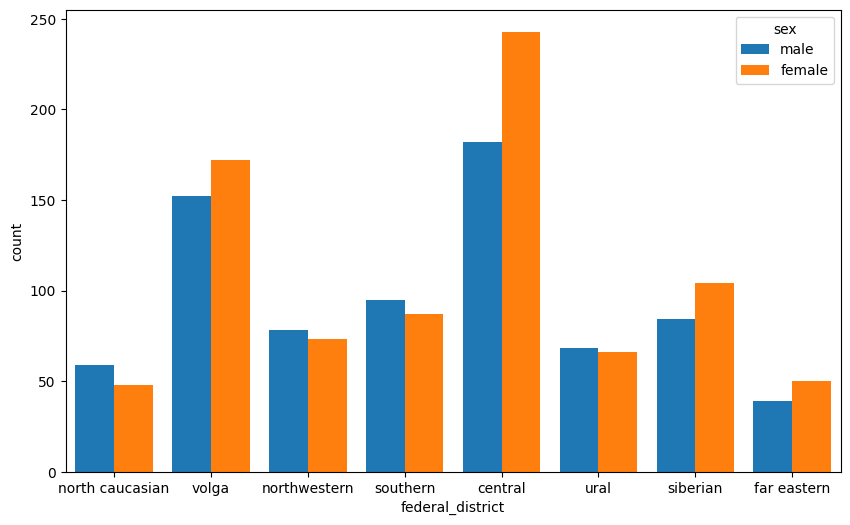

In [59]:
# voters from district count
plt.figure(figsize=(10,6))
sns.countplot(x="federal_district", data=election, saturation=1, hue= "sex")

Most of the voters are from central federal district. Then in second place, it is from volga.
There are more female voters than male voters from central, volga and siberian district.

<Axes: ylabel='count'>

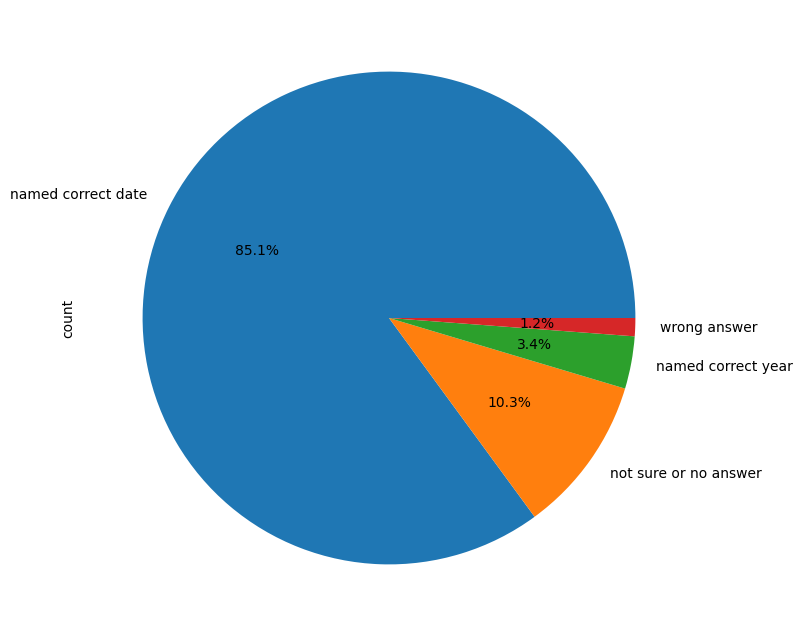

In [61]:
election['knows_election_date'].value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

85.1% voters named correct date and 3.4% of them voted correct year.
1.2% voted wrong and 10.3% of them didn't answer.

<Axes: ylabel='count'>

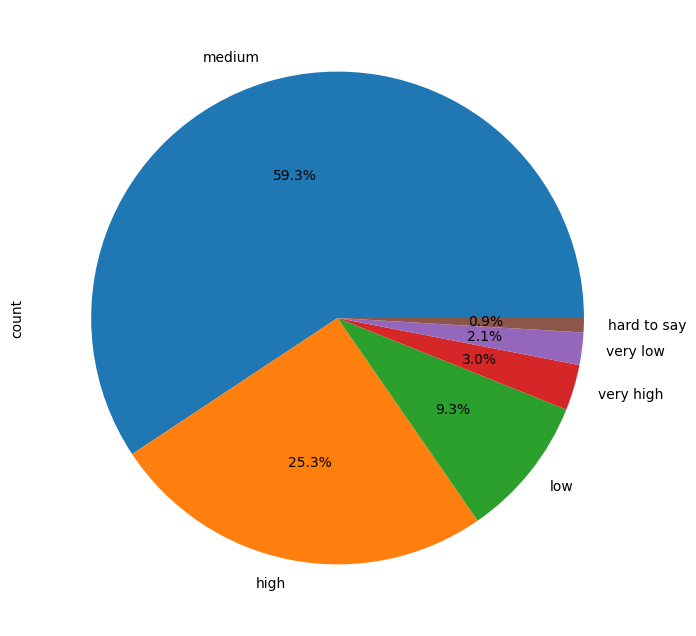

In [62]:
election['income'].value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

Most of the voters (59.3%) do income at medium scale.
25.3% voters are form rich category and 3% voters are from highly rich.
voters with low income and very low income is sufficiently small.

<Axes: ylabel='count'>

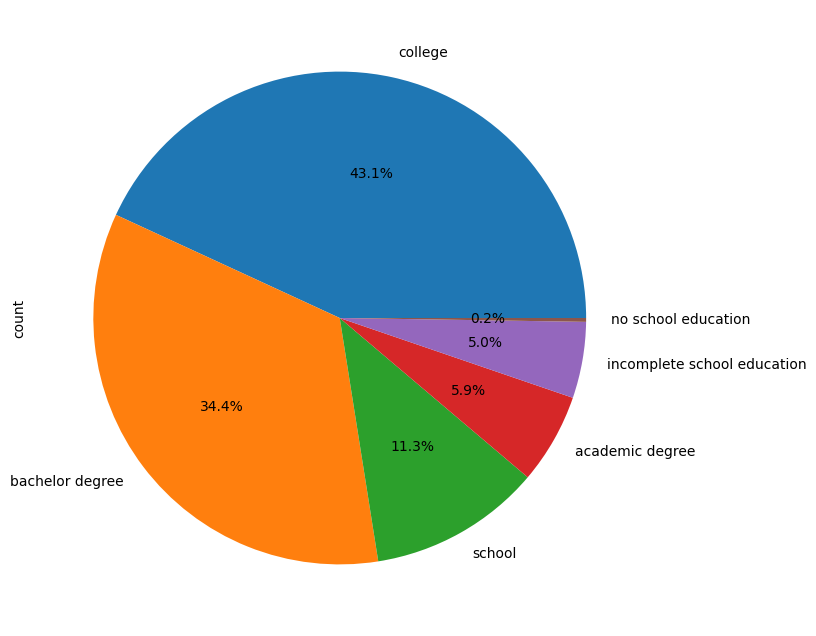

In [63]:
election['education'].value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

Most of the voters are college students or have completed bachelor degree.
Illeteracy rate is sufficiently low.

<Axes: ylabel='count'>

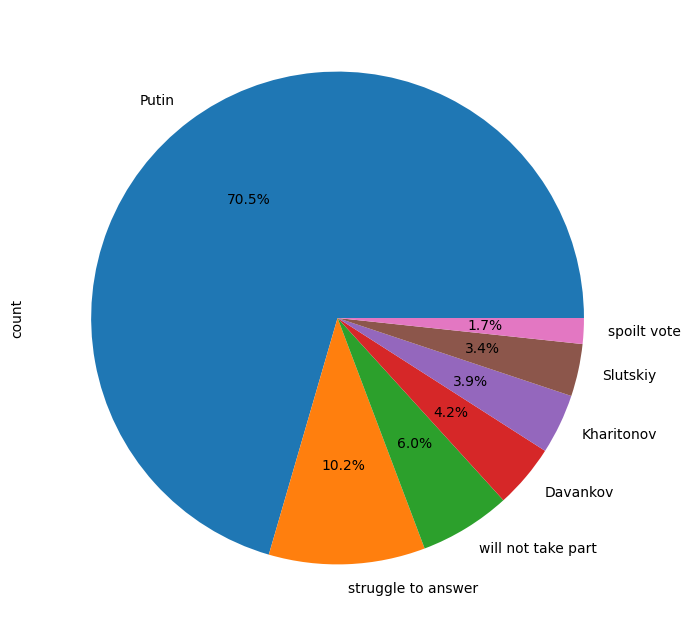

In [75]:
election['candidate'].value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

Clearly Putin has achieved a huge victory by defeting his fellow competetors with a massive range.

(array([133., 127., 247., 227., 193., 205., 193., 165.,  84.,  26.]),
 array([18. , 25.2, 32.4, 39.6, 46.8, 54. , 61.2, 68.4, 75.6, 82.8, 90. ]),
 <BarContainer object of 10 artists>)

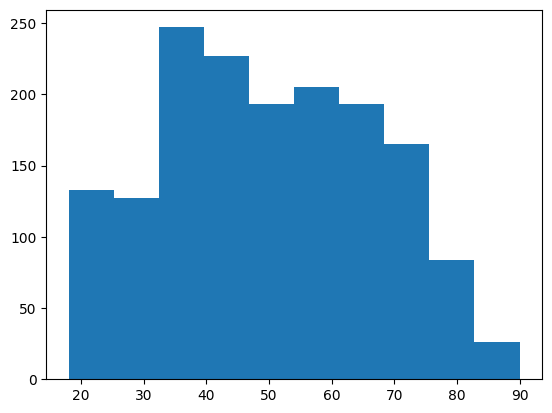

In [78]:
plt.hist(election['age'])

Most of the voters are from age of 40 to 70.